In [1]:
%load_ext autoreload
%autoreload 2
from get import *
from sklearn.manifold import TSNE
from matplotlib import cm



{0: '00_toy_dataset', 1: '01_mnist_cc', 2: '02_mnist_constant_image', 3: '03_mnist_constant_image_random_row', 4: '04_mnist_uniform_color_random_row', 5: '05_mnist_uniform_color_low_mix_rate', 6: '06_mnist_sum', 8: '08_mnist_sum_noise_level', 12: '12_mnist_mysterious', 13: '13_mnist_mysterious', 23: '23_mnist_embed', 456: '456_mnist_embed', 888: '888_vehicle_animal', 999: '999_humans'}


In [3]:
# Load data
X_labeled, y_labeled, X_unlabeled, X_val = load_datasets(n_dataset=23)
display_dataset(23)
X_all = torch.concat((X_labeled, X_unlabeled, X_val))
labels_all = np.concatenate((y_labeled, np.zeros(X_unlabeled.shape[0]), np.ones(X_val.shape[0])))


In [4]:
print(X_labeled.shape)
print(X_unlabeled.shape)
print(X_val.shape)
print(X_all.shape)


torch.Size([1209, 198])
torch.Size([3626, 198])
torch.Size([1209, 198])
torch.Size([6044, 198])


In [5]:
# Project data and get projector
def get_2d_repr(embeddings):
    tsne = TSNE(2, verbose=1)
    tsne_proj = tsne.fit_transform(embeddings)
    return tsne, tsne_proj

tsne, repr_2d = get_2d_repr(X_all)


/home/t-boulet/projects/hackathon42/Hackaton42/timothe/venvHACK42/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/t-boulet/projects/hackathon42/Hackaton42/timothe/venvHACK42/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6044 samples in 0.001s...
[t-SNE] Computed neighbors for 6044 samples in 1.193s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6044
[t-SNE] Computed conditional probabilities for sample 2000 / 6044
[t-SNE] Computed conditional probabilities for sample 3000 / 6044
[t-SNE] Computed conditional probabilities for sample 4000 / 6044
[t-SNE] Computed conditional probabilities for sample 5000 / 6044
[t-SNE] Computed conditional probabilities for sample 6000 / 6044
[t-SNE] Computed conditional probabilities for sample 6044 / 6044
[t-SNE] Mean sigma: 23.306165
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.124481
[t-SNE] KL divergence after 1000 iterations: 2.215228


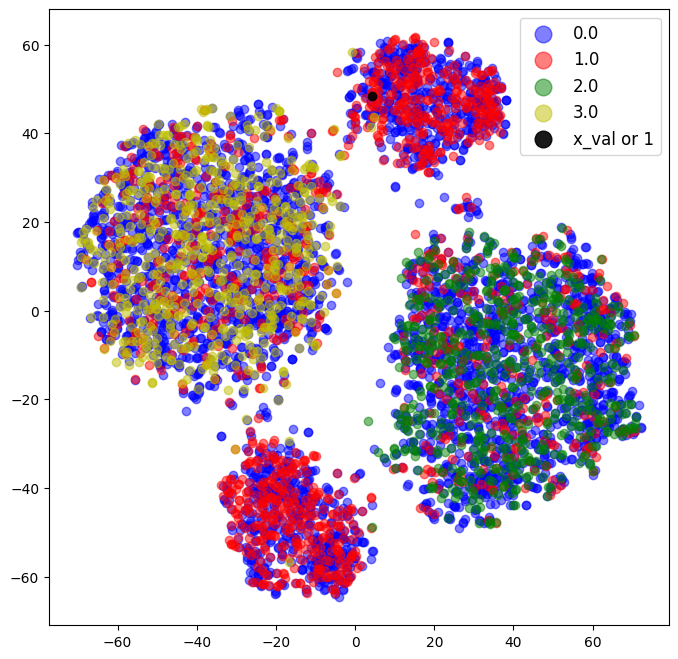

In [16]:
# Create a two dimensional t-SNE projection of the embeddings.
# Plot the points. We obserbe 4 clusters.

n_low = 25
def plot_embedding_2d(embeddings, repr_2d, labels = None, title=None, plot_x_val_2d_repr = True):
    if labels is None:
        labels = np.zeros(embeddings.shape[0])
    # Plot those points as a scatter plot and label them based on the pred labels
    colors = ['b', 'r', 'g', 'y', 'c', 'm', 'k', 'w']
    fig, ax = plt.subplots(figsize=(8,8))
    for lab in np.unique(labels):
        indices = labels==lab
        ax.scatter(repr_2d[indices,0], repr_2d[indices,1], c=colors[lab.astype(np.int32)], label = lab ,alpha=0.5)
    if plot_x_val_2d_repr:
        ax.scatter(repr_2d[labels == 1, 0][n_low], repr_2d[labels == 1, 1][n_low], c='k', label = 'x_val or 1' ,alpha=0.9)
    ax.legend(fontsize='large', markerscale=2)
    plt.show()
    
plot_embedding_2d(X_all, repr_2d = repr_2d ,labels = labels_all)

In [86]:
plot_embedding_2d(X_unlabeled)

TypeError: plot_embedding_2d() missing 1 required positional argument: 'repr_2d'

In [7]:
plot_embedding_2d(X_val)

TypeError: plot_embedding_2d() missing 1 required positional argument: 'repr_2d'

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1209 samples in 0.000s...


/home/t-boulet/projects/hackathon42/Hackaton42/timothe/venvHACK42/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/t-boulet/projects/hackathon42/Hackaton42/timothe/venvHACK42/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 1209 samples in 0.049s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1209
[t-SNE] Computed conditional probabilities for sample 1209 / 1209
[t-SNE] Mean sigma: 32.718935
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.751244
[t-SNE] KL divergence after 1000 iterations: 1.350075


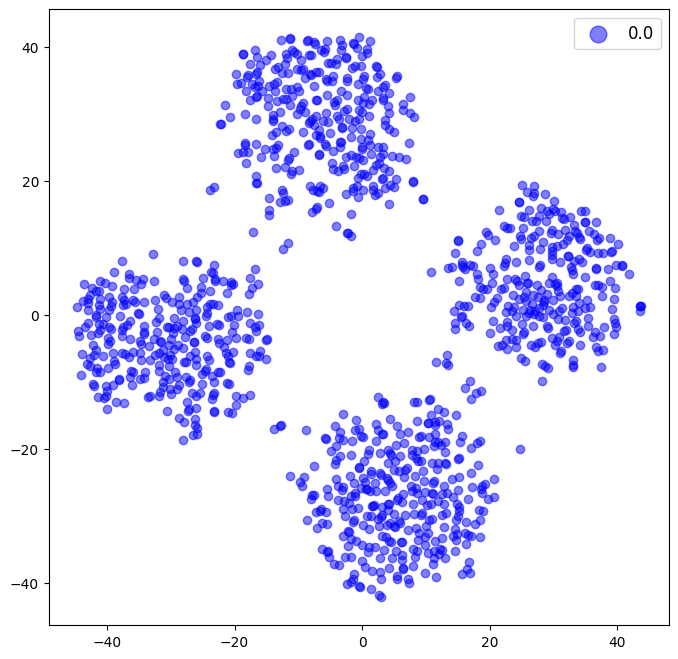

In [ ]:
plot_embedding_2d(X_val)

In [22]:
from time import time

from pykeops.torch import LazyTensor
use_cuda = torch.cuda.is_available()
print(use_cuda)
dtype = torch.float32 if use_cuda else torch.float64
device_id = "cuda:0" if use_cuda else "cpu"

embeddings_all = torch.concat((X_labeled, X_unlabeled, X_val))

K_clusters = 4
N, D, K = embeddings_all.shape[0], embeddings_all.shape[1], K_clusters

print(N, D, K)

True
6044 198 4


In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=K_clusters, random_state=0, n_init=20).fit(embeddings_all)

In [34]:
# Cluster the points
cluster_classes_all = kmeans.labels_
c = kmeans.cluster_centers_
print("Centroids: " + str(kmeans.cluster_centers_.shape))
print("Labels: " + str(kmeans.labels_.shape))
print(cluster_classes_all[:10])

Centroids: (4, 198)
Labels: (6044,)
[0 0 0 0 0 0 0 0 2 2]


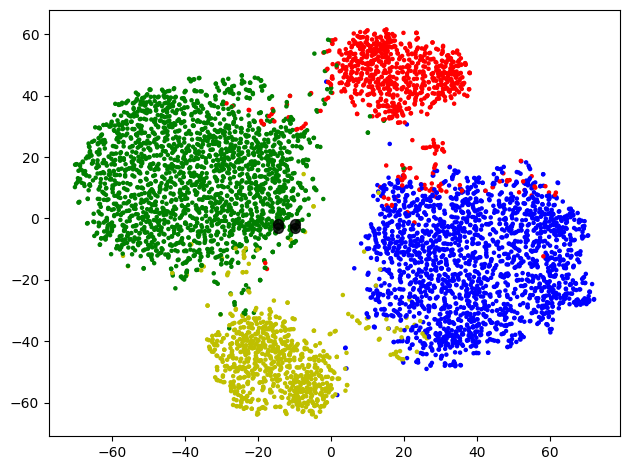

In [35]:
plt.figure()
colors = ['b', 'r', 'g', 'y', 'c', 'm', 'k', 'w']
colors2 = [colors[i] for i in cluster_classes_all]
plt.scatter(repr_2d[:, 0], repr_2d[:, 1], c=colors2, s=30000 / len(repr_2d))
plt.scatter(c[:, 0], c[:, 1], c="black", s=50, alpha=0.8)
# plt.axis([-2, 2, -2, 2])
plt.tight_layout()
plt.show()


In [38]:

# BLUE = cluster 0 = label 2
# RED = coeur = haut = cluster 1 = label 2
# GREEN = cluster 2 = label 3
# YELLOW = patate = bas = cluster 3 = label 3
# copy of array :

classes_all = np.copy(cluster_classes_all)
classes_all[cluster_classes_all == 0] = 2
classes_all[cluster_classes_all == 1] = 2
classes_all[cluster_classes_all == 3] = 3
classes_all[cluster_classes_all == 2] = 3

classes_val = classes_all[labels_all == 1]

print(classes_val.shape)

(1209,)


In [39]:
df = pd.DataFrame(classes_val)
df.to_csv(f"submission_23_final.csv", header=False, index=False)